In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

from sklearn.datasets import load_diabetes, load_breast_cancer, load_digits
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from itertools import product
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.svm import SVC

# Autoreload of the files
%load_ext autoreload
%autoreload 2

In [2]:
# Load dataset
X, y = load_digits(return_X_y=True)
digits = load_digits()
random_state = 4

# Vizualization
***

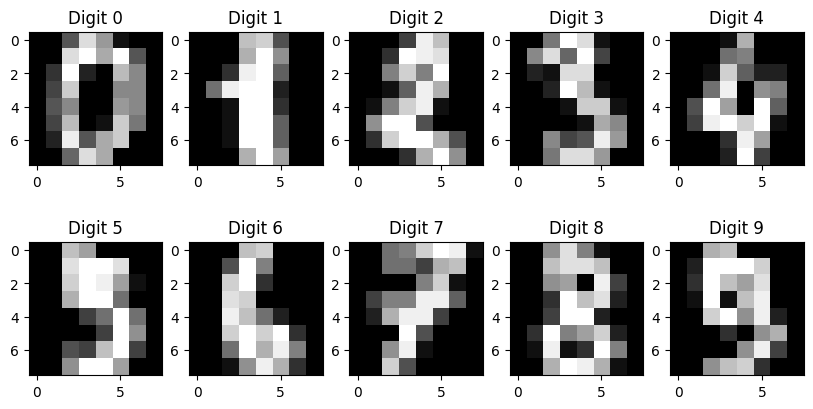

In [3]:
# Plot digits examples
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f'Digit {i}')
plt.show()

In [4]:
print(X.shape)
print(y.shape)
for class_ in np.unique(y):
    print(f"Class {class_}: {np.sum(y == class_)}")

(1797, 64)
(1797,)
Class 0: 178
Class 1: 182
Class 2: 177
Class 3: 183
Class 4: 181
Class 5: 182
Class 6: 181
Class 7: 179
Class 8: 174
Class 9: 180


# Training pipeline
***

In [5]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = random_state,
                                                    stratify = y)

In [6]:
# Check well split across classes
for class_ in np.unique(y):
    print(f"Class {class_}: Train = {np.sum(y_train == class_)}, Test = {np.sum(y_test == class_)}")

Class 0: Train = 142, Test = 36
Class 1: Train = 145, Test = 37
Class 2: Train = 142, Test = 35
Class 3: Train = 146, Test = 37
Class 4: Train = 145, Test = 36
Class 5: Train = 146, Test = 36
Class 6: Train = 145, Test = 36
Class 7: Train = 143, Test = 36
Class 8: Train = 139, Test = 35
Class 9: Train = 144, Test = 36


In [7]:
# Cross validation on the methods and the value of C
regularizations = [None, 'l2']
C = np.logspace(-6, 6, 20)
f1_scores = np.zeros((len(regularizations), len(C)))
for reg, c in product(regularizations, C):

    # Kfold
    kfold = KFold(n_splits = 4, random_state = random_state, shuffle = True)
    mean_f1 = np.zeros(4)

    # Loop on the folds
    for i, (train_index, test_index) in enumerate(kfold.split(X_train)):

        # Extract data
        X_sub_train, X_val = X_train[train_index], X_train[test_index]
        y_sub_train, y_val = y_train[train_index], y_train[test_index]

        # Train the model
        model = LogisticRegression(penalty = reg, C = c, random_state = random_state)
        model.fit(X_sub_train, y_sub_train)

        # Evaluate the model
        y_pred = model.predict(X_val)
        mean_f1[i] = accuracy_score(y_val, y_pred)
        
    f1_scores[regularizations.index(reg), np.argmax(C == c)] = np.mean(mean_f1)

/Users/gaspardvilla/miniconda3/envs/nat_ada/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/gaspardvilla/miniconda3/envs/nat_ada/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/gaspardvilla/miniconda3/envs/nat_ada/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/gaspardvilla/miniconda3/envs/nat_ada/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/gaspardvilla/miniconda3/envs/nat_ada/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_rati

In [8]:
# print results
for c, reg in product(C, regularizations):
    print(f"C: {c}, Regularization: {reg}, F1: {f1_scores[regularizations.index(reg), np.argmax(C == c)]}")

C: 1e-06, Regularization: None, F1: 0.9450228257505415
C: 1e-06, Regularization: l2, F1: 0.3820353605694832
C: 4.281332398719396e-06, Regularization: None, F1: 0.9450228257505415
C: 4.281332398719396e-06, Regularization: l2, F1: 0.7584938873413803
C: 1.8329807108324375e-05, Regularization: None, F1: 0.9450228257505415
C: 1.8329807108324375e-05, Regularization: l2, F1: 0.8761103373568555
C: 7.847599703514606e-05, Regularization: None, F1: 0.9450228257505415
C: 7.847599703514606e-05, Regularization: l2, F1: 0.9213556174558961
C: 0.0003359818286283781, Regularization: None, F1: 0.9450228257505415
C: 0.0003359818286283781, Regularization: l2, F1: 0.9401423707830393
C: 0.0014384498882876629, Regularization: None, F1: 0.9450228257505415
C: 0.0014384498882876629, Regularization: l2, F1: 0.9547585886722378
C: 0.00615848211066026, Regularization: None, F1: 0.9450228257505415
C: 0.00615848211066026, Regularization: l2, F1: 0.9658967811822965
C: 0.026366508987303555, Regularization: None, F1: 0.9

In [9]:
# Keep the maximum f1 score
max_f1 = np.max(f1_scores)
max_c = C[np.argmax(f1_scores, axis=1)[0]]
max_reg = regularizations[np.argmax(f1_scores, axis=0)[0]]

In [10]:
# Train with the best parameters
model = LogisticRegression(penalty = max_reg, C = max_c, random_state = random_state)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)

/Users/gaspardvilla/miniconda3/envs/nat_ada/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


In [11]:
# Full overview of the accuracy / precision / recall / f1 score for each class
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.90      0.97      0.94        37
           2       0.97      1.00      0.99        35
           3       1.00      0.95      0.97        37
           4       1.00      1.00      1.00        36
           5       0.97      1.00      0.99        36
           6       1.00      0.92      0.96        36
           7       0.97      1.00      0.99        36
           8       0.92      0.94      0.93        35
           9       1.00      0.94      0.97        36

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



# SVM
***

In [12]:
# SVM
model = SVC(kernel='linear', C=1.0, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred, average='macro')}")
print(f"Recall: {recall_score(y_test, y_pred, average='macro')}")
print(f"F1 Score: {f1_score(y_test, y_pred, average='macro')}")

Accuracy: 0.9722222222222222
Precision: 0.9725326287826288
Recall: 0.972050622050622
F1 Score: 0.9719532337365404


/var/folders/dc/28gdnyt16qg7f_cvxzb49rxc0000gn/T/ipykernel_64685/1251071002.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap=plt.cm.get_cmap('tab10', 10),  # Better colormap for digits


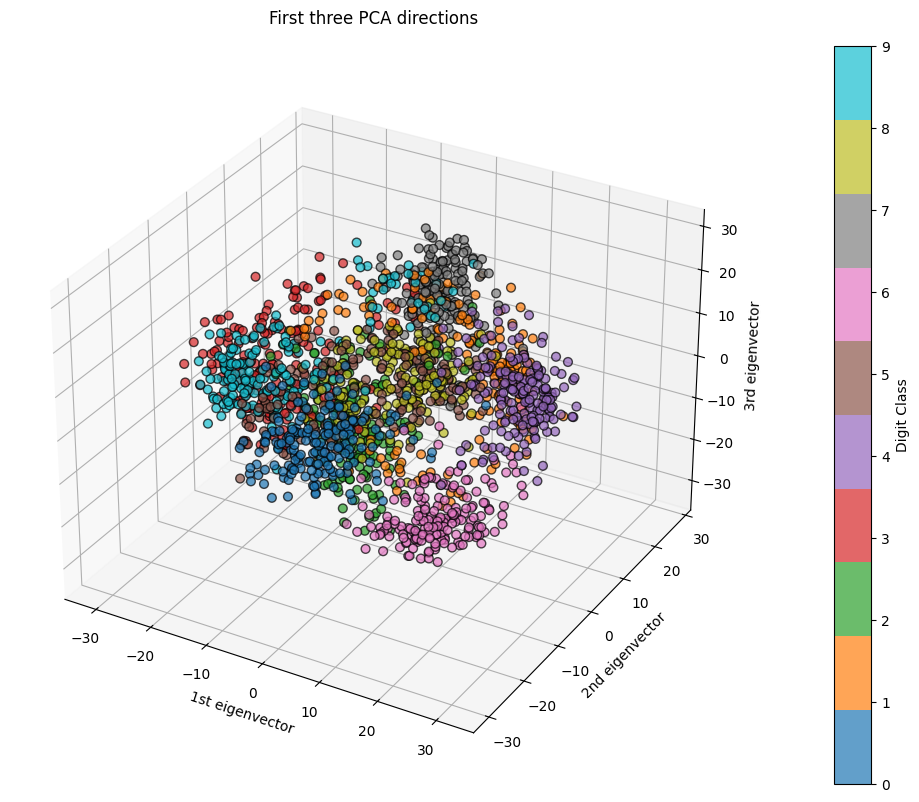

In [13]:
# PCA on the digits dataset to get a visualization of the data classes in 3D
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

# Load the digits dataset
digits = load_digits()

# Perform PCA
pca = PCA(n_components=3)
pca_digits = pca.fit_transform(digits.data)

# Create 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create the scatter plot
scatter = ax.scatter(
    pca_digits[:, 0], 
    pca_digits[:, 1], 
    pca_digits[:, 2], 
    c=digits.target, 
    cmap=plt.cm.get_cmap('tab10', 10),  # Better colormap for digits
    edgecolor='k',
    alpha=0.7,
    s=40
)

# Add labels and title
ax.set_title("First three PCA directions", pad=20)
ax.set_xlabel("1st eigenvector")
ax.set_ylabel("2nd eigenvector")
ax.set_zlabel("3rd eigenvector")

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Digit Class')

# Adjust layout and display
plt.tight_layout()
plt.show()